# Midpoint Analysis

In [1]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import pytz


In [2]:
# Adjusting the start and end times
frequency = "1m"
start_time = (datetime.now(pytz.timezone('UTC')) - timedelta(days=1)).strftime('%Y-%m-%d')  # 5 days ago from the current date
end_time = (datetime.now(pytz.timezone('UTC'))).strftime('%Y-%m-%d')  # Current date in UTC

In [3]:
# Define your tickers, start time, end time, and frequency
tickers = ["BTCC-B.TO"]

# Initialize an empty DataFrame for combined data
combined_data = pd.DataFrame()

# Retrieve historical data for each ticker
for ticker in tickers:
    # Download historical data for the ticker
    data = yf.download(ticker, start=start_time, end=end_time, interval=frequency)[['High', 'Low', 'Open', 'Close']]
    
    # Check if the index is already timezone-aware and convert timezone if necessary
    if data.index.tz is None:
        # If the index is not timezone-aware, localize to UTC first then convert to Pacific Time
        data.index = data.index.tz_localize('UTC').tz_convert('US/Pacific')
    else:
        # If the index is already timezone-aware, directly convert to Pacific Time
        data.index = data.index.tz_convert('US/Pacific')
    
    # Combine data for each ticker into a single DataFrame with unique column names
    for col in data.columns:
        combined_column_name = f"{ticker}_{col}"  # Create a unique column name
        combined_data[combined_column_name] = data[col]
combined_data

[*********************100%%**********************]  1 of 1 completed


,BTCC-B.TO_High,BTCC-B.TO_Low,BTCC-B.TO_Open,BTCC-B.TO_Close
Datetime,,,,
2024-02-14 06:30:00-08:00,10.03,10.02,10.02,10.03
2024-02-14 06:31:00-08:00,10.08,10.05,10.05,10.08
2024-02-14 06:32:00-08:00,10.10,10.08,10.08,10.10
2024-02-14 06:33:00-08:00,10.09,10.05,10.09,10.07
2024-02-14 06:34:00-08:00,10.07,10.05,10.05,10.07
...,...,...,...,...
2024-02-14 12:53:00-08:00,10.04,10.04,10.04,10.04
2024-02-14 12:55:00-08:00,10.04,10.04,10.04,10.04
2024-02-14 12:56:00-08:00,10.05,10.05,10.05,10.05


### Midpoint

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'combined_data' is your DataFrame

# Convert the index to a datetime index if it's not already
combined_data.index = pd.to_datetime(combined_data.index)

# Convert the timezone to Pacific time
combined_data.index = combined_data.index.tz_convert('US/Pacific')

# Filter rows to keep only those after 9 am Pacific time
combined_data = combined_data.loc[combined_data.index.hour >= 10]

# Extract the date from the datetime index
combined_data['date'] = combined_data.index.date

# Extract the first 'BTCC-B.TO_Open' of each day
first_values_daily = combined_data.groupby('date')['BTCC-B.TO_Open'].first()

# Map these first opening values back onto the combined_data DataFrame
# This directly uses the current day's date to fetch the opening price
combined_data['current_day_open'] = combined_data['date'].apply(lambda x: first_values_daily.get(x, np.nan))

# Calculate percent change for each minute against the current day's opening price
combined_data['percent_change_high'] = (combined_data['BTCC-B.TO_High'] - combined_data['current_day_open']) / combined_data['current_day_open'] * 100
combined_data['percent_change_low'] = (combined_data['BTCC-B.TO_Low'] - combined_data['current_day_open']) / combined_data['current_day_open'] * 100

# Drop rows where 'percent_change' is NaN (i.e., potentially the first entries if the opening price is not available)
combined_data.dropna(subset=['percent_change_high'], inplace=True)
combined_data.dropna(subset=['percent_change_low'], inplace=True)

# The DataFrame 'combined_data' now contains the additional columns 'current_day_open' and 'percent_change',
# which represent the opening price of BTCC-B.TO for the current day and the percent change of the high price
# from the opening price for each entry, respectively.
combined_data

C:\Users\Windows\AppData\Local\Temp\ipykernel_24260\118078440.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_data['date'] = combined_data.index.date
C:\Users\Windows\AppData\Local\Temp\ipykernel_24260\118078440.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_data['current_day_open'] = combined_data['date'].apply(lambda x: first_values_daily.get(x, np.nan))
C:\Users\Windows\AppData\Local\Temp\ipykernel_24260\118078440.py:27: SettingWithCopyWarning: 
A value is trying to be set on

,BTCC-B.TO_High,BTCC-B.TO_Low,BTCC-B.TO_Open,BTCC-B.TO_Close,date,current_day_open,percent_change_high,percent_change_low
Datetime,,,,,,,,
2024-02-14 10:02:00-08:00,10.045,10.045,10.045,10.045,2024-02-14,10.045,0.000000,0.000000
2024-02-14 10:03:00-08:00,10.040,10.040,10.040,10.040,2024-02-14,10.045,-0.049777,-0.049777
2024-02-14 10:07:00-08:00,10.040,10.040,10.040,10.040,2024-02-14,10.045,-0.049777,-0.049777
2024-02-14 10:09:00-08:00,10.030,10.010,10.030,10.010,2024-02-14,10.045,-0.149331,-0.348431
2024-02-14 10:10:00-08:00,10.010,10.010,10.010,10.010,2024-02-14,10.045,-0.348431,-0.348431
...,...,...,...,...,...,...,...,...
2024-02-14 12:53:00-08:00,10.040,10.040,10.040,10.040,2024-02-14,10.045,-0.049777,-0.049777
2024-02-14 12:55:00-08:00,10.040,10.040,10.040,10.040,2024-02-14,10.045,-0.049777,-0.049777
2024-02-14 12:56:00-08:00,10.050,10.050,10.050,10.050,2024-02-14,10.045,0.049777,0.049777


In [5]:
combined_data['current_day_open'].unique()

array([10.04500008])

In [6]:
# Calculate the absolute difference between the current and previous High prices
combined_data['high_price_diff'] = combined_data['BTCC-B.TO_High'].diff().abs()

# Calculate the absolute difference between the current and previous Low prices
combined_data['low_price_diff'] = combined_data['BTCC-B.TO_Low'].diff().abs()

# Calculate the previous High and Low prices (shifted by 1 to align with the current row)
combined_data['prev_high'] = combined_data['BTCC-B.TO_High'].shift(1)
combined_data['prev_low'] = combined_data['BTCC-B.TO_Low'].shift(1)

# Calculate the absolute percentage change for High against the previous timepoint
combined_data['abs_percent_change_high'] = (combined_data['high_price_diff'] / combined_data['prev_high']) * 100

# Calculate the absolute percentage change for Low against the previous timepoint
combined_data['abs_percent_change_low'] = (combined_data['low_price_diff'] / combined_data['prev_low']) * 100

# Drop rows where 'abs_percent_change_high' or 'abs_percent_change_low' is NaN
# This is likely to happen for the very first row where there is no previous timepoint
combined_data.dropna(subset=['abs_percent_change_high', 'abs_percent_change_low'], inplace=True)

# Calculate the sum of the 'abs_percent_change_high' column
sum_abs_percent_change_high = combined_data['abs_percent_change_high'].sum()

# Calculate the sum of the 'abs_percent_change_low' column
sum_abs_percent_change_low = combined_data['abs_percent_change_low'].sum()

# Print the sums
print("Sum of absolute percentage change for High:", sum_abs_percent_change_high)
print("Sum of absolute percentage change for Low:", sum_abs_percent_change_low)


Sum of absolute percentage change for High: 6.137703206477923
Sum of absolute percentage change for Low: 6.237781012475844


C:\Users\Windows\AppData\Local\Temp\ipykernel_24260\1095726614.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_data['high_price_diff'] = combined_data['BTCC-B.TO_High'].diff().abs()
C:\Users\Windows\AppData\Local\Temp\ipykernel_24260\1095726614.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_data['low_price_diff'] = combined_data['BTCC-B.TO_Low'].diff().abs()
C:\Users\Windows\AppData\Local\Temp\ipykernel_24260\1095726614.py:8: SettingWithCopyWarning: 
A value is trying to be set on

## Descriptive Stats

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import skew, kurtosis, normaltest

# Assuming 'combined_data' already has the 'percent_change' column calculated

# Just ensure to drop NaN values from the 'percent_change' column
# This is important to remove the first day's data or any other missing data points
percent_change_high = combined_data['percent_change_high'].dropna()

# Calculate the mean and standard deviation of the percent changes
mean_percent_change = np.mean(percent_change_high)
stddev_percent_change = np.std(percent_change_high)

# Calculate skewness and kurtosis
skewness = skew(percent_change_high)
kurtosis_value = kurtosis(percent_change_high)

# Perform the normality test
normality_test_result = normaltest(percent_change_high)

# Print the calculated mean, standard deviation, skewness, kurtosis, and normality test results
print(f'Mean of Percent Changes: {mean_percent_change}')
print(f'Standard Deviation of Percent Changes: {stddev_percent_change}')
print(f'Skewness of Percent Changes: {skewness}')
print(f'Kurtosis of Percent Changes: {kurtosis_value}')
print(f'Normality Test Results: Statistic={normality_test_result.statistic:.2f}, P-value={normality_test_result.pvalue:.2e}')

# Interpretation of normality test results
if normality_test_result.pvalue < 0.05:
    print("The distribution of percent changes is not normally distributed (reject H0).")
else:
    print("There is not enough evidence to conclude that the distribution of percent changes is not normally distributed (fail to reject H0).")


Mean of Percent Changes: -0.21494223933171208
Standard Deviation of Percent Changes: 0.3167322700511911
Skewness of Percent Changes: 0.08749987543810685
Kurtosis of Percent Changes: -1.146157596539703
Normality Test Results: Statistic=22.00, P-value=1.67e-05
The distribution of percent changes is not normally distributed (reject H0).


## % Change High Dist

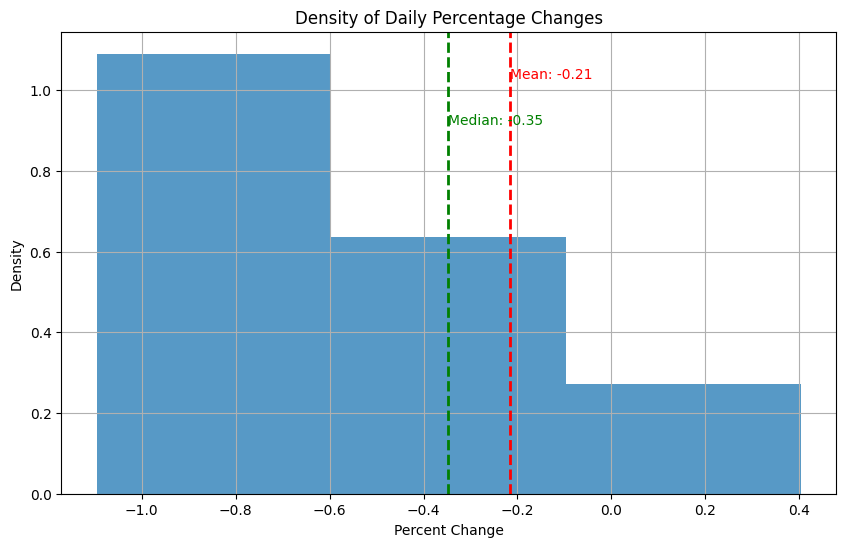

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'percent_change_high' is defined as before

# Calculate the median of percent changes
median_percent_change = np.median(combined_data['percent_change_high'])
mean_percent_change = np.mean(combined_data['percent_change_high'])

# 1. Determine Bin Edges
bin_width = 0.5  # Adjusted bin width to 1 for this example
min_change = combined_data['percent_change_high'].min()
max_change = combined_data['percent_change_high'].max()
bins = np.arange(min_change, max_change + bin_width, bin_width)

# 2. Compute Histogram
counts, bin_edges = np.histogram(combined_data['percent_change_high'], bins=bins)

# 3. Convert Counts to Density
total_counts = counts.sum()
bin_widths = np.diff(bin_edges)
density = counts / (total_counts * bin_widths)

# 4. Store Density Information in a DataFrame
density_df = pd.DataFrame({'Bin Edge Start': bin_edges[:-1], 'Density': density})

# Plotting the density manually
plt.figure(figsize=(10, 6))
plt.bar(density_df['Bin Edge Start'], density_df['Density'], width=bin_width, alpha=0.75)
plt.title('Density of Daily Percentage Changes')
plt.xlabel('Percent Change')
plt.ylabel('Density')
plt.grid(True)

# Add a line for the mean
plt.axvline(mean_percent_change, color='r', linestyle='dashed', linewidth=2)
plt.text(mean_percent_change, plt.ylim()[1] * 0.9, f'Mean: {mean_percent_change:.2f}', color='r')

# Add a line for the median
plt.axvline(median_percent_change, color='g', linestyle='dashed', linewidth=2)
plt.text(median_percent_change, plt.ylim()[1] * 0.8, f'Median: {median_percent_change:.2f}', color='g')

plt.show()


## % Change Low Dist

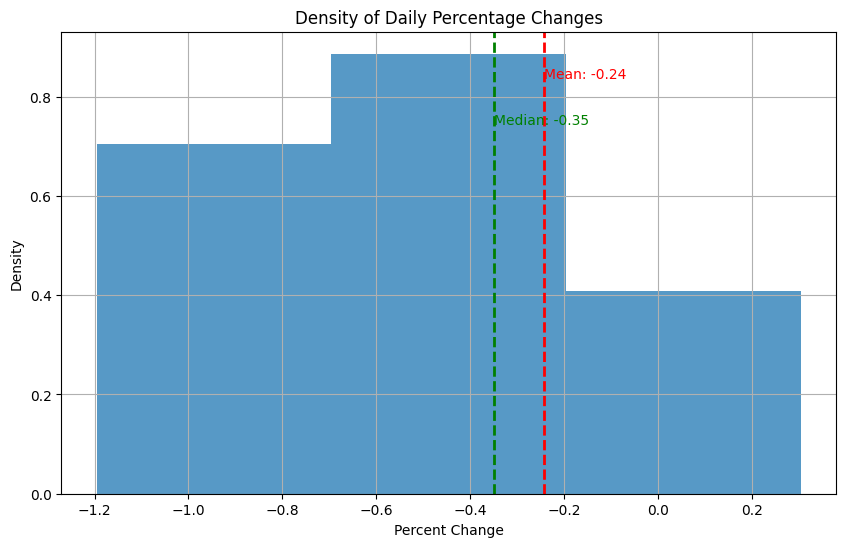

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'percent_change_high' is defined as before

# Calculate the median of percent changes
median_percent_change = np.median(combined_data['percent_change_low'])
mean_percent_change = np.mean(combined_data['percent_change_low'])

# 1. Determine Bin Edges
bin_width = 0.5  # Adjusted bin width to 1 for this example
min_change = combined_data['percent_change_low'].min()
max_change = combined_data['percent_change_low'].max()
bins = np.arange(min_change, max_change + bin_width, bin_width)

# 2. Compute Histogram
counts, bin_edges = np.histogram(combined_data['percent_change_low'], bins=bins)

# 3. Convert Counts to Density
total_counts = counts.sum()
bin_widths = np.diff(bin_edges)
density = counts / (total_counts * bin_widths)

# 4. Store Density Information in a DataFrame
density_df = pd.DataFrame({'Bin Edge Start': bin_edges[:-1], 'Density': density})

# Plotting the density manually
plt.figure(figsize=(10, 6))
plt.bar(density_df['Bin Edge Start'], density_df['Density'], width=bin_width, alpha=0.75)
plt.title('Density of Daily Percentage Changes')
plt.xlabel('Percent Change')
plt.ylabel('Density')
plt.grid(True)

# Add a line for the mean
plt.axvline(mean_percent_change, color='r', linestyle='dashed', linewidth=2)
plt.text(mean_percent_change, plt.ylim()[1] * 0.9, f'Mean: {mean_percent_change:.2f}', color='r')

# Add a line for the median
plt.axvline(median_percent_change, color='g', linestyle='dashed', linewidth=2)
plt.text(median_percent_change, plt.ylim()[1] * 0.8, f'Median: {median_percent_change:.2f}', color='g')

plt.show()
